In [1]:
!pip install texthero

     |████████████████████████████████| 245kB 6.3MB/s 
     |████████████████████████████████| 1.4MB 11.5MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434675 sha256=e948d70e0a0acc90a12a3ac550738d4b5577fb9bca2cae1cb291e4063b8d0cc2
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
What is Texthero?
Texthero is a simple Python toolkit that helps you work with a text-based dataset. 
It provides quick and easy functionalities that let you preprocess, represent, map into vectors, and visualize text data in just a couple of lines of code
Texthero is designed to be used on top of pandas, so it makes it easier to preprocess and analyze text-based Pandas Series or Dataframes.
If you are working on an NLP project, Texthero can help you get things done faster than before and gives you more time to focus on important tasks.

In [ ]:
Texthero has four useful modules that handle different functionalities that you can apply in your text-based dataset.

1.Preprocessing
This module allows for the efficient pre-processing of text-based Pandas Series or DataFrames. It has different methods to clean your text dataset such as lowercase(), remove_html_tags() and remove_urls().
2.NLP
This module has a few NLP tasks such as named_entities, noun_chunks, keyphrases and keywords extraction, and named entity recognition.and so on.
3.Representation
This module has different algorithms to map words into vectors such as TF-IDF, GloVe, Principal Component Analysis(PCA), word-embeddings and term_frequency.
4.Vector space analysis: 
clustering (K-means, Meanshift, DBSAN and Hierarchical), topic modelling (wip) and interpretation. After vectorization we can group those similar kind of embeddings using clustering
5.Visualization
The last module has three different methods to visualize the insights and statistics of a text-based Pandas DataFrame. It can plot a scatter plot and word cloud.

In [2]:
import texthero
help(texthero)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Help on package texthero:

NAME
    texthero - Texthero: python toolkit for text preprocessing, representation and visualization.

PACKAGE CONTENTS
    extend_pandas
    nlp
    preprocessing
    representation
    stop_words
    stopwords
    visualization

DATA
    Callable = typing.Callable
    List = typing.List
    Optional = typing.Optional
    Set = typing.Set

FILE
    /usr/local/lib/python3.7/dist-packages/texthero/__init__.py




In [ ]:
Supported representation algorithms:

Term frequency (count)
Term frequency-inverse document frequency (tfidf)
Supported clustering algorithms:

K-means (kmeans)
Density-Based Spatial Clustering of Applications with Noise (dbscan)
Meanshift (meanshift)
Supported dimensionality reduction algorithms:

Principal component analysis (pca)
t-distributed stochastic neighbor embedding (tsne)
Non-negative matrix factorization (nmf)

**Text Preprocessing**

In [4]:
#Convert Text->Series
import pandas as pd
text="It's a pleasant   day at Bangaloré; at / (10:30) am"
series=pd.Series(text)

In [5]:
series

0    It's a pleasant   day at Bangaloré; at / (10:3...
dtype: object

In [6]:
import texthero as hero
hero.remove_digits(series)

0    It's a pleasant   day at Bangaloré; at / ( : ) am
dtype: object

In [7]:
hero.remove_punctuation(series)

0    It s a pleasant   day at Bangaloré  at    10 3...
dtype: object

In [8]:
hero.remove_brackets(series)

0    It's a pleasant   day at Bangaloré; at /  am
dtype: object

In [9]:
hero.remove_diacritics(series)

0    It's a pleasant   day at Bangalore; at / (10:3...
dtype: object

In [10]:
hero.remove_whitespace(series)

0    It's a pleasant day at Bangaloré; at / (10:30) am
dtype: object

In [11]:
hero.remove_stopwords(series)

0    It'  pleasant   day  Bangaloré;  / (10:30) 
dtype: object

In [12]:
hero.clean(series)

0    pleasant day bangalore
dtype: object

In [17]:
#Remove Digits:You can use the remove_digits() function to remove digits in your text-based datasets.
text = pd.Series("Hi my phone number is +255 711 111 111 call me at 09:00 am")
clean_text = hero.preprocessing.remove_digits(text)

print(clean_text)

0    Hi my phone number is +        call me at  :  am
dtype: object


In [19]:
#Remove Stopwords:You can use the remove_stopwords() function to remove stopwords in your text-based datasets.
text = pd.Series("you need to know NLP to develop the chatbot that you desire")
clean_text = hero.remove_stopwords(text)
print(clean_text)

0     need  know NLP  develop  chatbot   desire
dtype: object


In [20]:
#Remove URLs:You can use the remove_urls() function to remove links in your text-based datasets.
text = pd.Series("Go to https://www.freecodecamp.org/news/ to read more articles you like")
clean_text = hero.remove_urls(text)
print(clean_text)

0    Go to   to read more articles you like
dtype: object


In [21]:
#Tokenize:Tokenize each row of the given Pandas Series by using the tokenize() method and return a Pandas Series where each row contains a list of tokens.
text = pd.Series(["You can think of Texthero as a tool to help you understand and work with text-based dataset. "])
clean_text = hero.tokenize(text)
print(clean_text)

0    [You, can, think, of, Texthero, as, a, tool, t...
dtype: object


In [23]:
#Remove HTML Tags:You can remove HTML tags from the given Pandas Series by using the remove_html_tags() method.

text = pd.Series("<html><body><h2>hello world</h2></body></html>")
clean_text = hero.remove_html_tags(text)
print(clean_text)

0    hello world
dtype: object


In [13]:
df = pd.read_csv(
   "https://github.com/jbesomi/texthero/raw/master/dataset/bbcsport.csv"
)
df.head()

,text,topic
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics
2,Greene sets sights on world title\n\nMaurice G...,athletics
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics


In [14]:
###PCA
import texthero as hero
import pandas as pd

df = pd.read_csv(
   "https://github.com/jbesomi/texthero/raw/master/dataset/bbcsport.csv"
)

df['pca']=(df['text'].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))
hero.scatterplot(df, 'pca', color='topic', title="PCA BBC Sport news")

In [15]:
df.head()

,text,topic,pca
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[-0.09113340787759908, 0.10341315165756365]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[-0.0003859439175142281, 0.02483666566471275]"
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[-0.11759976066376827, 0.12865667703180955]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[-0.09134235103392947, 0.15399062187885984]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[-0.09123224839313908, 0.13498625242922238]"


In [16]:
import texthero as hero
import pandas as pd

df = pd.read_csv(
    "https://github.com/jbesomi/texthero/raw/master/dataset/bbcsport.csv"
)

df['tfidf'] = (
    df['text']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
)
### Kmeans

df['kmeans_labels'] = (
    df['tfidf']
    .pipe(hero.kmeans, n_clusters=5)
    .astype(str)
)

df['pca'] = df['tfidf'].pipe(hero.pca)

hero.scatterplot(df, 'pca', color='kmeans_labels', title="K-means BBC Sport news")

In [ ]:
#import important packages
import texthero as hero
import pandas as pd

In [24]:
from google.colab import files
uploaded = files.upload()

Saving swahili_zindi_hackathon.csv to swahili_zindi_hackathon.csv


In [27]:
#load dataset 
data = pd.read_csv("swahili_zindi_hackathon.csv")

In [28]:
# show top 5 rows 
data.head()

,titles,category,content
0,Wanaochezea amani waonywa,Kitaifa,SERIKALI imesema haitakuwa tayari kuona amani...
1,Mwanri asitisha likizo za viongozi Tabora,Biashara,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti..."
2,Wauza samaki Songea wahimizwa usafi,Biashara,Mwito huo ulitolewa jana na mkuu wa masoko wa...
3,Kocha Rayon matumain kibao,michezo,KOCHA wa Rayon Sports Janvier Martinez Espino...
4,Magori aula Simba Sports,michezo,BODI ya Wakurugenzi ya klabu ya Simba imemteu...


In [29]:
# select news content only and show top 5 rows
news_content = data[["content"]]
news_content.head()

,content
0,SERIKALI imesema haitakuwa tayari kuona amani...
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti..."
2,Mwito huo ulitolewa jana na mkuu wa masoko wa...
3,KOCHA wa Rayon Sports Janvier Martinez Espino...
4,BODI ya Wakurugenzi ya klabu ya Simba imemteu...


In [30]:
#Preprocessing with Texthero.
#We can use the clean(). method to pre-process a text-based Pandas Series.
# clean the news content by using clean method from hero package
news_content['clean_content'] = hero.clean(news_content['content'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
The clean() method runs seven functions when you pass a pandas series. These seven functions are:

lowercase(s): Lowercases all text.
remove_diacritics(): Removes all accents from strings.
remove_stopwords(): Removes all stop words.
remove_digits(): Removes all blocks of digits.
remove_punctuation(): Removes all string.punctuation (!”#$%&’()*+,-./:;<=>?@[]^_`{|}~).
fillna(s): Replaces unassigned values with empty spaces.
remove_whitespace(): Removes all white space between words

In [31]:
#we can see the cleaned news content.
#show unclean and clean news content
news_content.head()

,content,clean_content
0,SERIKALI imesema haitakuwa tayari kuona amani...,serikali imesema haitakuwa tayari kuona amani ...
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",mkuu wa mkoa wa tabora aggrey mwanri amesitish...
2,Mwito huo ulitolewa jana na mkuu wa masoko wa...,mwito huo ulitolewa jana na mkuu wa masoko wa ...
3,KOCHA wa Rayon Sports Janvier Martinez Espino...,kocha wa rayon sports janvier martinez espinos...
4,BODI ya Wakurugenzi ya klabu ya Simba imemteu...,bodi ya wakurugenzi ya klabu ya simba imemteua...


In [32]:
#Custom Cleaning
#If the default pipeline from the clean() method does not fit your needs, you can create a custom pipeline with the list of functions that you want to apply in your dataset.
#As an example, I created a custom pipeline with only 5 functions to clean my dataset.
#create custom pipeline
from texthero import preprocessing

custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_urls,
                   ]

In [33]:
#Now I can use the custom_pipeline to clean my dataset.

#altearnative for custom pipeline
news_content['clean_custom_content'] = news_content['content'].pipe(hero.clean, custom_pipeline)

In [34]:
#You can see the clean dataset we have created by using the custom pipeline.
# show output of custom pipeline
news_content.clean_custom_content.head()

0    serikali imesema haitakuwa tayari kuona amani ...
1    mkuu wa mkoa wa tabora  aggrey mwanri amesitis...
2    mwito huo ulitolewa jana na mkuu wa masoko wa ...
3    kocha wa rayon sports janvier martinez espinos...
4    bodi ya wakurugenzi ya klabu ya simba imemteua...
Name: clean_custom_content, dtype: object

In [ ]:
#Useful visualization methods
#Texthero contains different methods to visualize the insights and statistics of a text-based Pandas DataFrame.

1.Top Words
If you want to know the top words in your text-based dataset, you can use the top_words() method from the visualization module. This method is useful if you want to see additional words that you can add to the stop word lists.

This method does not return a bar graph, so I will use matplotlib to visualize the top words in a bar graph.


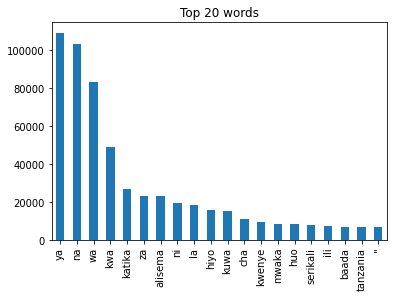

In [38]:
import matplotlib.pyplot as plt
NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(news_content['clean_content']).head(NUM_TOP_WORDS)
# Draw the bar chart
top_20.plot.bar(rot=90, title="Top 20 words");
plt.show(block=True);

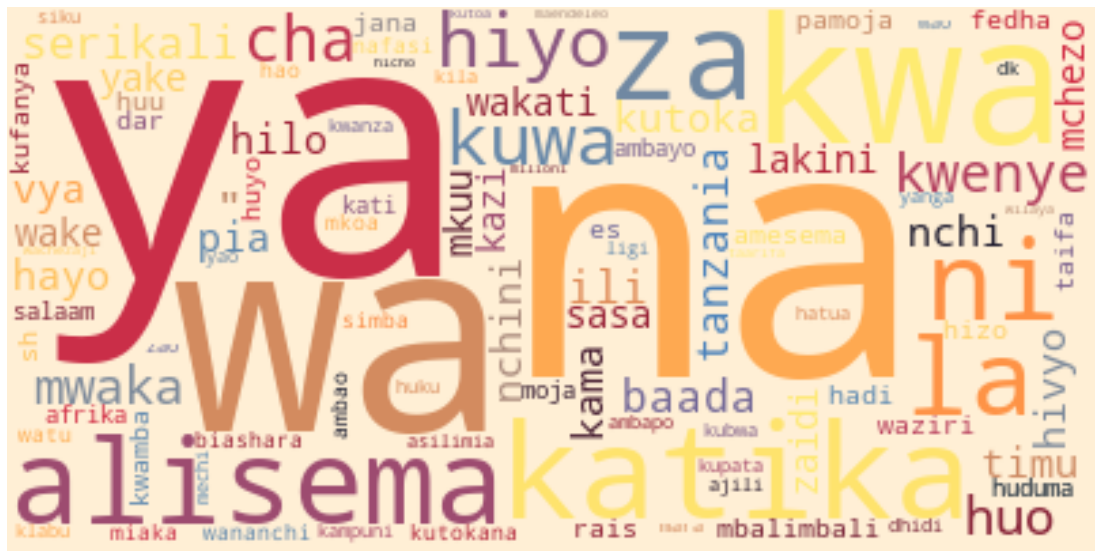

In [39]:
#Wordclouds
#The wordcloud() method from the visualization module plots an image using WordCloud from the word_cloud package.
#Plot wordcloud image using WordCloud method
hero.wordcloud(news_content.clean_content, max_words=100,)

In [ ]:
#Useful representation methods
#Texthero contains different methods from the representation module that help you map words into vectors using different algorithms such as TF-IDF, word2vec, or GloVe.

In [ ]:
TF-IDF
You can represent a text-based Pandas Series using TF-IDF. I created a new pandas series with two pieces of news content and represented them in TF_IDF features by using the tfidf() method.

In [40]:
# Create a new text-based Pandas Series.
news = pd.Series(["mkuu wa mkoa wa tabora aggrey mwanri amesitisha likizo za viongozi wote mkoani humo kutekeleza maazimio ya jukwaa la fursa za biashara la mkoa huo", "serikali imetoa miezi sita kwa taasisi zote za umma ambazo hazitumii mfumo wa gepg katika ukusanyaji wa fedha kufanya hivyo na baada ya hapo itafanya ukaguzi na kuwawajibisha"])
#convert into tfidf features 
hero.tfidf(news)

0    [0.187132760851739, 0.0, 0.187132760851739, 0....
1    [0.0, 0.18557550845969953, 0.0, 0.185575508459...
dtype: object

In [ ]:
Term Frequency
You can represent a text-based Pandas Series using the term_frequency() method. Term frequency (TF) is used to show how frequently an expression (term or word) occurs in a document or text content.

In [41]:
news = pd.Series(["mkuu wa mkoa wa tabora aggrey mwanri amesitisha likizo za viongozi wote mkoani humo kutekeleza maazimio ya jukwaa la fursa za biashara la mkoa huo", "serikali imetoa miezi sita kwa taasisi zote za umma ambazo hazitumii mfumo wa gepg katika ukusanyaji wa fedha kufanya hivyo na baada ya hapo itafanya ukaguzi na kuwawajibisha"])
# Represent a text-based Pandas Series using term_frequency.
hero.term_frequency(news)

0    [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...
1    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...
dtype: object

In [ ]:
K-means
Texthero can perform K-means clustering algorithm by using the kmeans() method. If you have an unlabeled text-based dataset, you can use this method to group content according to their similarities.

In [42]:
column_names = ["content","tfidf", "kmeans_labels"]
news = pd.DataFrame(columns = column_names)

In [43]:
#We will use only the first 30 pieces of cleaned content from our news_content dataframe and cluster them into groups by using the kmeans() method.
# collect 30 clean content.
news["content"] = news_content.clean_content[:30]
# convert them into tf-idf features.
news['tfidf'] = (
    news['content']
    .pipe(hero.tfidf)
)
# perform clustering algorithm by using kmeans() 
news['kmeans_labels'] = (
    news['tfidf']
    .pipe(hero.kmeans, n_clusters=5)
    .astype(str)
)

In [44]:
#In the pipeline of the k-means method, we passed the number of clusters which is 5. This means we will group these contents into 5 groups.Now the selected news content has been labeled into five groups.
# show content and their labels
news[["content","kmeans_labels"]].head()

,content,kmeans_labels
0,serikali imesema haitakuwa tayari kuona amani ...,2
1,mkuu wa mkoa wa tabora aggrey mwanri amesitish...,2
2,mwito huo ulitolewa jana na mkuu wa masoko wa ...,1
3,kocha wa rayon sports janvier martinez espinos...,0
4,bodi ya wakurugenzi ya klabu ya simba imemteua...,3


In [ ]:
PCA
You can also use the pca() method to perform principal component analysis on the given Pandas Series. Principal component analysis (PCA) is a technique for reducing the dimensionality of your datasets. This increases interpretability but at the same time minimizes information loss.
In this example, we use the tfidf features from the news dataframe and represent them into two components by using the pca() method. Finally, we will show a scatterplot by using the scatterplot() method.

In [45]:
#perform pca
news['pca'] = news['tfidf'].pipe(hero.pca)
#show scatterplot
hero.scatterplot(news, 'pca', color='kmeans_labels', title="news")